In [1]:
%matplotlib notebook

from numpy import array, copy, empty, linspace, ma, savez, ones
from numba import njit, vectorize
from concurrent.futures import ThreadPoolExecutor
from matplotlib.ticker import AutoMinorLocator
import matplotlib.pyplot as plt
import matplotlib.animation as an
import matplotlib as mpl


## <font face="Times New Roman"> Thermal conduction</font>
### <font face="Times New Roman"> The differential form of Fourier's law of thermal conduction:</font>
$$q=-k\nabla T$$
### <font face="Times New Roman"> for an isotropic medium of 1D geometry, Fourier's law leads to heat equation:</font>
$$\frac{\partial T}{\partial t}=\alpha \frac{\partial^2 T}{\partial x^2}$$

In [25]:
@njit()
def iterate(T, dt, dx, alpha):
    M, N = T.shape
    for i in range(M-1):
        for j in range(1, N-1):
            dT = dt*alpha*((T[i, j+1] - T[i, j]) - (T[i, j] - T[i, j-1]))/dx**2
            T[i+1, j] = T[i, j] + dT
            T[i+1, 0] = T[i, 0]
            T[i+1, -1] = T[i, -1]
    return T

In [26]:
Th = 373
Tl = 273
T0 = 298
alpha = 0.01

t = 1
dt = 1e-3
l = 0.2
dl = 1e-2

N = int(l/dl)
M = int(t/dt)

T = empty([M, N], dtype=float)
T[0, :] = array([Th] + [T0 for _ in range(N-2)] + [Tl])

In [27]:
T = iterate(T, dt, dl, alpha)
savez("conduction.npz", T=T)

<IPython.core.display.Javascript object>


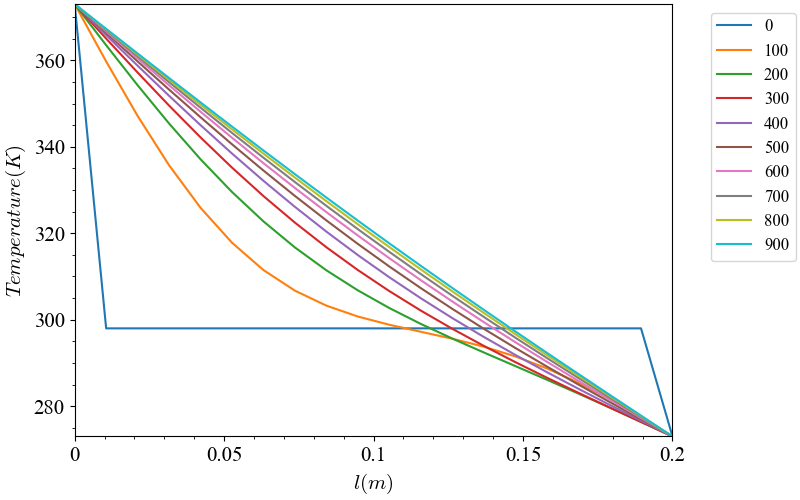

In [28]:
font = {"fontname": "Times New Roman"}
mpl.rcParams["mathtext.fontset"] = "cm"

fig = plt.figure(figsize=(8, 5), dpi=100, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0, 0])

for i in range(0, M, 100):
    ax1.plot(linspace(0, l, N), T[i, :], label="%d" % i)

ax1.legend(bbox_to_anchor=[1.05, 1], loc='upper left', prop={"size": 12, "family": "Times New Roman"})
ax1.set_ylabel('$Temperature(K)$', fontsize=15)
ax1.set_xlabel('$l(m)$', fontsize=15)
ax1.set_xticks([0, 0.05, 0.1, 0.15, 0.2])
ax1.set_yticks(range(260, 400, 20))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.set_xticklabels([0, 0.05, 0.1, 0.15, 0.2], **font, fontsize=15)
ax1.set_yticklabels(range(260, 400, 20), **font, fontsize=15)
ax1.set_ylim(Tl, Th)
ax1.set_xlim(0, 0.2)
plt.show()

## <font face="Times New Roman"> Thermal radiation<font>
### <font face="Times New Roman"> With the equation given by Stefen-Boltzmann law, the power radiating off a non-black body:</font>
$$P=\sigma \epsilon AT^4$$
### <font face="Times New Roman"> same as above, we expand $P=Q/\Delta t$ to get:</font>
$$\Delta T=\frac{\sigma \epsilon kT^4}{c\rho \Delta l}\Delta t$$

In [23]:
@njit()
def iterate(T, dt, dl, B):
    M, N = T.shape
    for i in range(M-1):
        for j in range(1, N-1):
            dT = dt*B*((T[i, j-1]**4 - T[i, j]**4) + (T[i, j+1]**4 - T[i, j]**4))/dl
            T[i+1, j] = T[i, j] + dT
            T[i+1, 0] = T[i, 0]
            T[i+1, -1] = T[i, -1]
    return T

In [24]:
Th = 373
Tl = 273
T0 = 298
B = 6.977*5.6704e-8*0.8

t = 0.5
dt = 1e-2
l = 20
dl = 1

N = int(l/dl)
M = int(t/dt)

T = empty([M, N], dtype=float)
T[0, :] = array([Th] + [T0 for _ in range(N-2)] + [Tl])

In [25]:
T = iterate(T, dt, dl, B)
savez("radiation.npz", T=T)

<IPython.core.display.Javascript object>


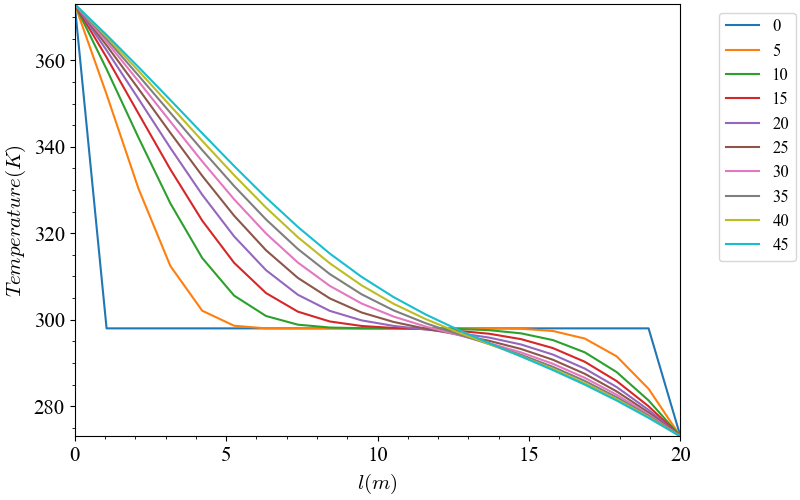

In [26]:
font = {"fontname": "Times New Roman"}
mpl.rcParams["mathtext.fontset"] = "cm"

fig = plt.figure(figsize=(8, 5), dpi=100, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0, 0])

for i in range(0, M, 5):
    ax1.plot(linspace(0, l, N), T[i, :], label="%d" % i)

ax1.legend(bbox_to_anchor=[1.05, 1], loc='upper left', prop={"size": 12, "family": "Times New Roman"})
ax1.set_ylabel('$Temperature(K)$', **font, fontsize=15)
ax1.set_xlabel('$l(m)$', **font, fontsize=15)
ax1.set_xticks([0, 5, 10, 15, 20])
ax1.set_yticks(range(260, 400, 20))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.set_xticklabels([0, 5, 10, 15, 20], **font, fontsize=15)
ax1.set_yticklabels(range(260, 400, 20), **font, fontsize=15)
ax1.set_ylim(Tl, Th)
ax1.set_xlim(0, 20)
plt.show()

## <font face="Times New Roman"> Thermal Convection</font>

In [2]:
@njit()
def iterate(T, dt, dl, B):
    M, N = T.shape
    for i in range(M-1):
        for j in range(1, N-1):
            dT = dt*B*((T[i, j-1] - T[i, j]) + (T[i, j+1] - T[i, j]))/dl**2
            T[i+1, j] = T[i, j] + dT
            
        T[i+1, 1:] = copy(T[i+1, :-1])
        T[i+1, 0] = T[i, 0]
        T[i+1, 1] = T[i, -1]
    return T

In [3]:
Th = 373
Tl = 273
T0 = 298
B = 0.026*6.997

t = 20
dt = 1
l = 20
dl = 1

N = int(l/dl)
M = int(t/dt)

T = empty([M, N], dtype=float)
T[0, :] = array([Th] + [Tl for _ in range(N-2)] + [Tl])

In [32]:
T = iterate(T, dt, dl, B)
savez("convection.npz", T=T)

<IPython.core.display.Javascript object>


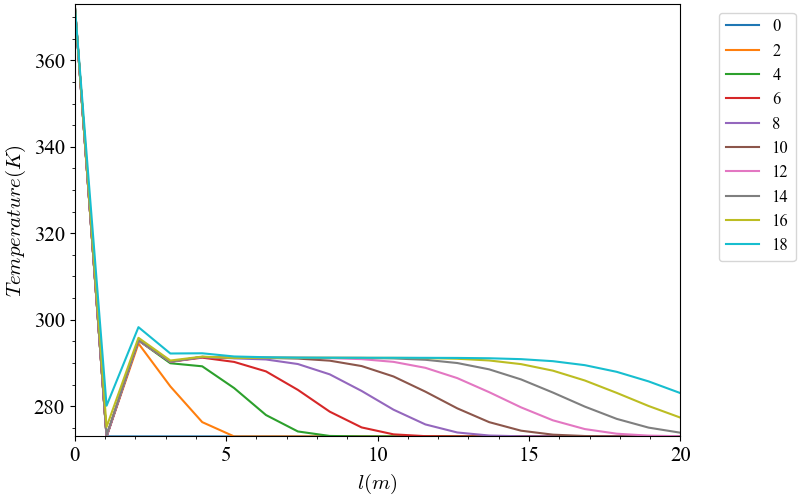

In [33]:
font = {"fontname": "Times New Roman"}
mpl.rcParams["mathtext.fontset"] = "cm"

fig = plt.figure(figsize=(8, 5), dpi=100, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax1 = fig.add_subplot(gs[0, 0])

for i in range(0, M, 2):
    ax1.plot(linspace(0, l, N), T[i, :], label="%d" % i)

ax1.legend(bbox_to_anchor=[1.05, 1], loc='upper left', prop={"size": 12, "family": "Times New Roman"})
ax1.set_ylabel('$Temperature(K)$', **font, fontsize=15)
ax1.set_xlabel('$l(m)$', **font, fontsize=15)
ax1.set_xticks([0, 5, 10, 15, 20])
ax1.set_yticks(range(260, 400, 20))
ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.set_xticklabels([0, 5, 10, 15, 20], **font, fontsize=15)
ax1.set_yticklabels(range(260, 400, 20), **font, fontsize=15)
ax1.set_ylim(Tl, Th)
ax1.set_xlim(0, 20)
plt.show()

In [40]:
x = linspace(0, 20, 20)
fig = plt.figure()
ax = plt.axes()
im, = plt.plot(x, T[0, :])

ifps = 100

def init():
    im.set_ydata(T[0, :])
    return im, 

def animate(i):
    if i % ifps == 0:
        im.set_ydata(T[int(i/ifps), :])
    return im, 

ani = an.FuncAnimation(fig, animate, range(20*ifps), init_func=init,
                              interval=1, blit=True)
plt.show()
